#Assesment ClO 3: Tugas Pemrograman Learning


**Topik**:klasifikasi pada Dataset Abalone menggunakan Metode Machine Learning Regression
**KELOMPOK**

Anggota:
1. Muhammad Fakhrul Hizrian - 1301223174
2. Muhammad Rifki HIdayatullah - 1301220250

##**A. Pendahuluan**

Dalam era big data saat ini, analisis dan pemrosesan data memainkan peran penting dalam berbagai bidang, termasuk ilmu biologi, ekonomi, dan teknik. Salah satu tantangan utama dalam analisis data adalah klasifikasi, yaitu proses pengkategorian data ke dalam kelas-kelas yang telah ditentukan berdasarkan fitur-fitur yang ada. Klasifikasi memungkinkan kita untuk membuat prediksi dan pengambilan keputusan yang lebih baik berdasarkan pola yang ditemukan dalam data historis.
Dataset Abalone adalah salah satu dataset terkenal yang sering digunakan dalam studi klasifikasi dan regresi. Dataset ini, yang tersedia di UCI Machine Learning Repository, berisi informasi tentang karakteristik fisik dari abalone (sejenis moluska laut), seperti panjang, berat, dan jumlah cincin pada cangkang. Jumlah cincin ini dapat digunakan untuk memperkirakan umur abalone, karena satu cincin biasanya mewakili satu tahun kehidupan.
Meskipun metode regresi linear biasanya digunakan untuk prediksi nilai kontinu, dalam studi ini, kita akan menggunakan berbagai metode regresi machine learning untuk memprediksi umur abalone.


##B. Data Preparation

####Import Library


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

####Read Dataset

In [41]:
dataset = pd.read_csv("abalone.csv")

In [42]:
print(dataset)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

####Konversi kolom kategorikal sex menjadi value numerik

In [43]:
dataset['Sex'] = dataset['Sex'].map({'M': 1, 'F': 2, 'I': 3})


####Cek data

In [44]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##C. Data Preprocessing

####Memeriksa Data yang hilang

In [45]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


####Mengecek Outlier

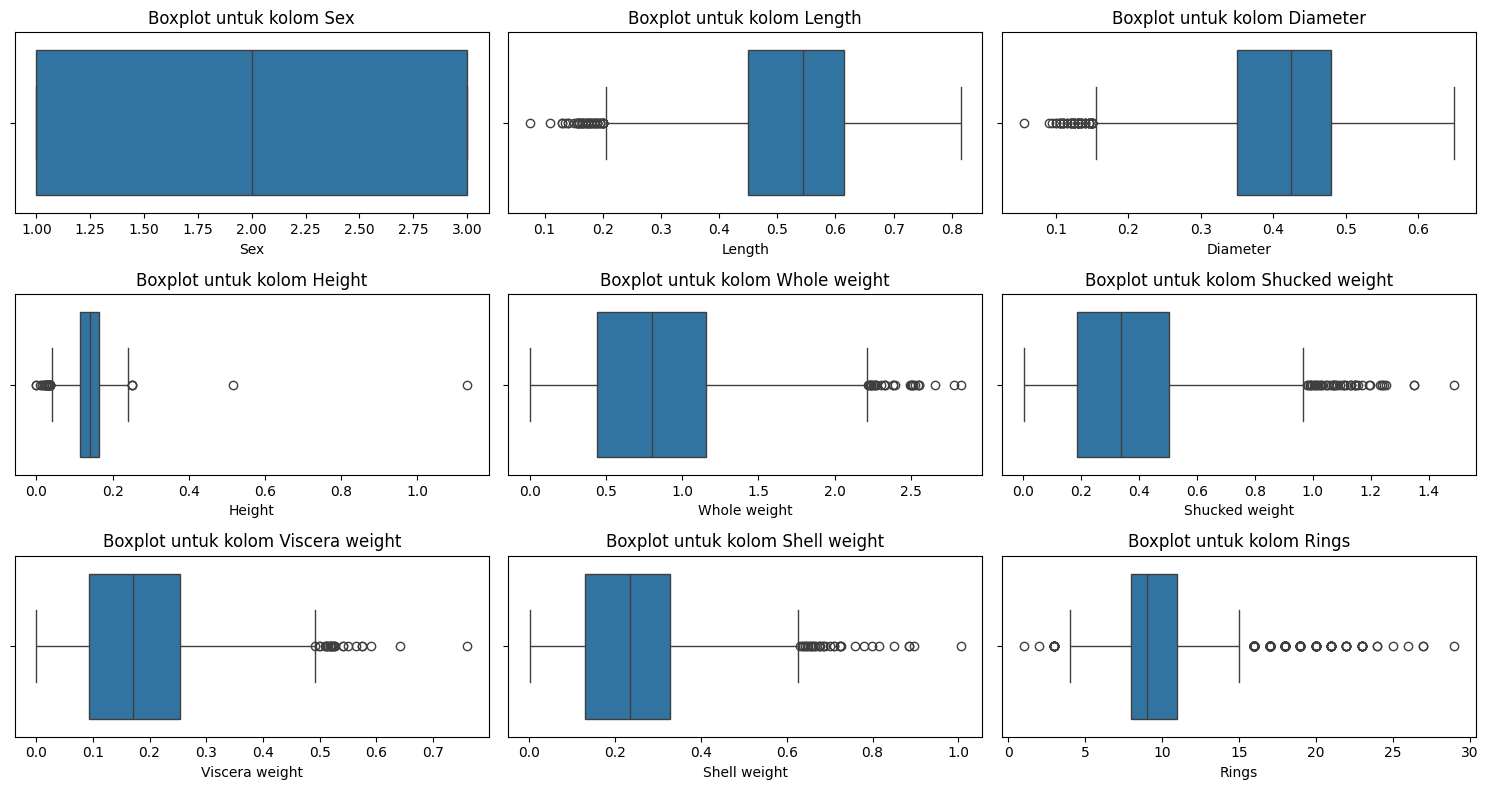

In [46]:
# Menampilkan plot sebelum penanganan outliers
num_cols = len(dataset.select_dtypes(include=['int','float']).columns)
plt.figure(figsize=(15,8))
rows = (num_cols + 2) // 3
for i ,col in enumerate(dataset.select_dtypes(include=['int','float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk kolom {col}')
plt.tight_layout()
plt.show()

####Menangani Outliers

In [47]:
# Mendeteksi dan menangani outlier menggunakan metode IQR
def handle_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x <lower_bound else x))
  return data

for col in dataset.select_dtypes(include=['int','float']).columns:
  dataset = handle_outliers(dataset, col)

print("Outliers berhasil ditangani")

Outliers berhasil ditangani


####Mengecek Outlier

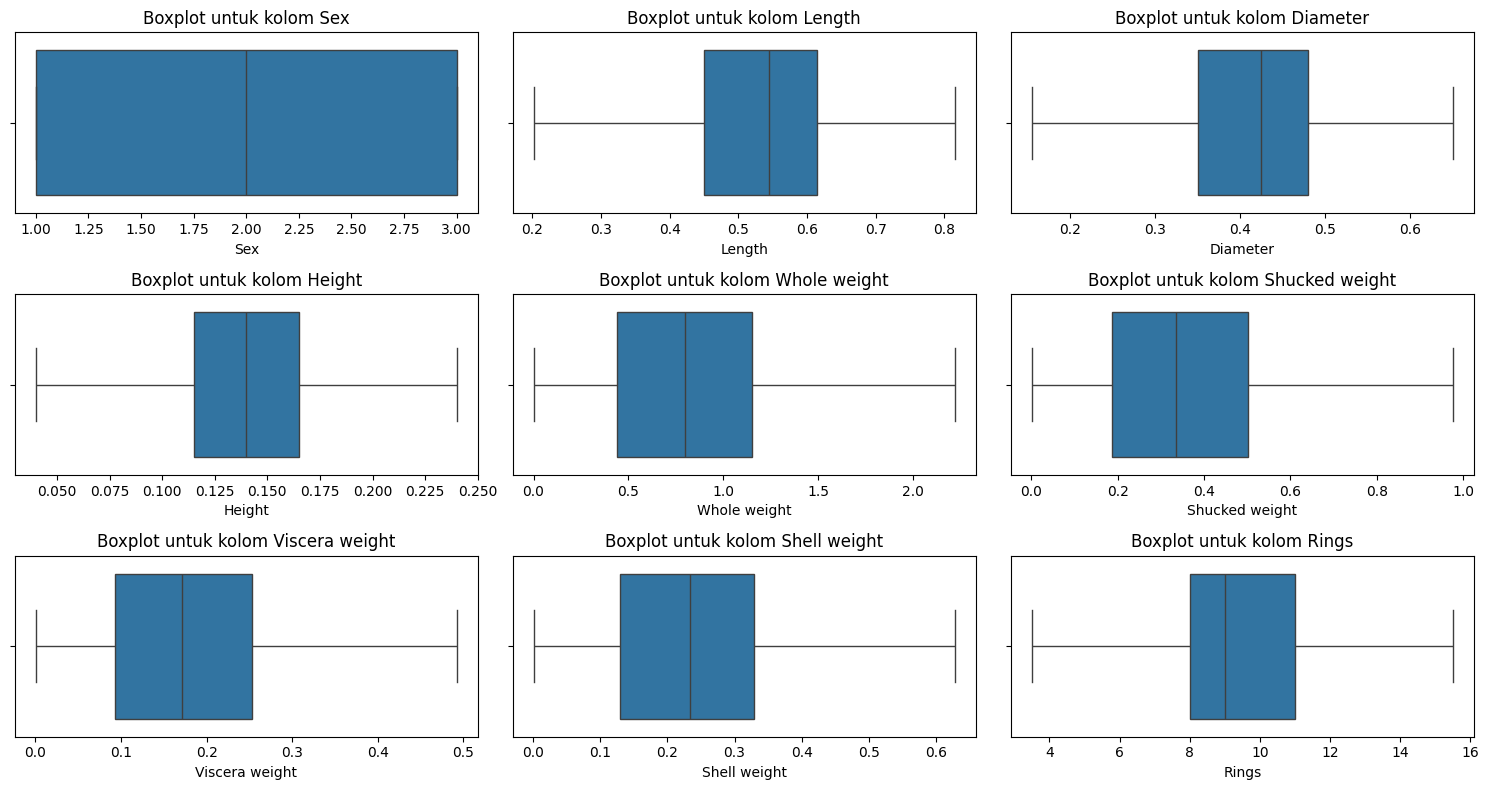

In [48]:
# Menampilkan plot sesudah penanganan outliers
num_cols = len(dataset.select_dtypes(include=['int','float']).columns)
plt.figure(figsize=(15,8))
rows = (num_cols + 2) // 3
for i ,col in enumerate(dataset.select_dtypes(include=['int','float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk kolom {col}')
plt.tight_layout()
plt.show()

####Membagi dataset menjadi X dan Y

In [49]:
X = dataset.iloc[:, 2:].values
Y = dataset.iloc[:, 1].values

####Menampilkan beberapa baris pertama dari X

In [50]:
print("Head of X:")
print(X[:5, :])

Head of X:
[[ 0.365   0.095   0.514   0.2245  0.101   0.15   15.    ]
 [ 0.265   0.09    0.2255  0.0995  0.0485  0.07    7.    ]
 [ 0.42    0.135   0.677   0.2565  0.1415  0.21    9.    ]
 [ 0.365   0.125   0.516   0.2155  0.114   0.155  10.    ]
 [ 0.255   0.08    0.205   0.0895  0.0395  0.055   7.    ]]


####Menampilkan beberapa baris pertama dari Y

In [51]:
print("Head of Y:")
print(Y[:5])

Head of Y:
[0.455 0.35  0.53  0.44  0.33 ]


####Memisahkan Dataset Menjadi Data Latih(Training Set) dan Data Uji (Test Set)
membagi dataset menjadi dua bagian, yaitu data pelatihan(X_train dan Y_train) dan data pengujian(X_test dan Y_test), yang dalam kasus ini, dataset akan dibagi menjadi data pelatihan(75%) dan data pengujian(25%)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

####Penskalaan Fitur
Melakukan penskalaan fitur sehingga mean sekitar 0 dan simpangan baku (standard deviation) sekitar 1

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Menampilkan beberapa baris pertama dari X_train dan X_test Setelah dilakukan Feature Scaling

In [65]:
print("Head of X_train")
print(X_train[:5, :])

print("\nHead of X_test:")
print(X_test[:5, :])

Head of X_train
[[-0.66655417 -0.91305605 -0.79604449 -0.76293154 -0.80471551 -0.83614326
  -1.01496276]
 [ 0.56661206  0.26706335  0.39303214  0.80932131  0.05653262 -0.47287452
  -0.6514148 ]
 [ 1.08043133  0.66043648  0.80859179  0.66408388  1.06516011  0.82975581
   0.07568112]
 [-1.488665   -1.43755357 -1.30623654 -1.34849198 -1.18698072 -1.25445271
  -0.6514148 ]
 [ 1.49148674  1.44718275  1.88554961  1.60927987  2.20735015  2.02230471
   0.80277704]]

Head of X_test:
[[ 0.15555665  0.39818773  0.16776589 -0.3871585   0.56314917  0.69398871
   1.166325  ]
 [-0.10135298 -0.51968292 -0.45248775 -0.46323525 -0.35797182 -0.34444617
  -0.6514148 ]
 [ 0.72075784  0.39818773  0.86310828  0.76321419  1.76981767  0.56556037
   0.43922908]
 [-2.51630352 -2.22429983 -1.60762015 -1.56750081 -1.56464033 -1.61772145
  -1.74205868]
 [ 0.92628555  0.92268524  1.38770091  1.43868352  1.78363449  1.00588611
   0.80277704]]


##D. Metode yang Digunakan

####Metode Linear Regression

In [55]:
model = LinearRegression()

####Train The Model


In [56]:
model.fit(X_train, Y_train)

LinearRegression()

####Membuat Pegujian

In [57]:
Y_pred = model.predict(X_test)

####Evaluasi model

In [58]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

##E. Hasil dan Analisis

In [66]:
print(f"\nMean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Display model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")




Mean Squared Error: 0.00032926035127923286
Mean Absolute Error: 0.013489199784547707
R-squared: 0.9776656009404544

Model Coefficients:
Intercept: 0.5263737228607924
Coefficients: [ 1.04230425e-01  2.66359172e-03 -1.54776518e-03  9.62520312e-03
  6.64402589e-03 -3.84436134e-03  6.14202190e-05]


Secara keseluruhan, nilai-nilai metrik menunjukkan bahwa model regresi linear sangat akurat untuk data Abalone:

- MSE dan MAE yang rendah menunjukkan bahwa kesalahan prediksi model
  sangat kecil.
- R² yang tinggi menunjukkan bahwa model sangat baik dalam menjelaskan
  variabilitas dalam data.

**Model Coefficients**

Model coefficients memberikan wawasan tentang bagaimana setiap fitur (variabel independen) mempengaruhi target (variabel dependen). Berikut adalah interpretasi singkatnya:

Intercept: 0.5263737228607924

- Ini adalah nilai prediksi ketika semua fitur bernilai nol.

Coefficients:

- [ 1.04230425e-01, 2.66359172e-03, -1.54776518e-03, 9.62520312e-03, 6.
  64402589e-03, -3.84436134e-03, 6.14202190e-05 ]
- Setiap nilai koefisien mewakili perubahan dalam target untuk setiap
  unit perubahan dalam fitur yang sesuai, dengan asumsi fitur lain tetap konstan. Misalnya, koefisien pertama 1.04230425e-01 menunjukkan bahwa jika fitur pertama meningkat satu unit, target akan meningkat sekitar 0.104, dengan asumsi fitur lain tetap konstan.


####Visualization: Predicted vs Actual

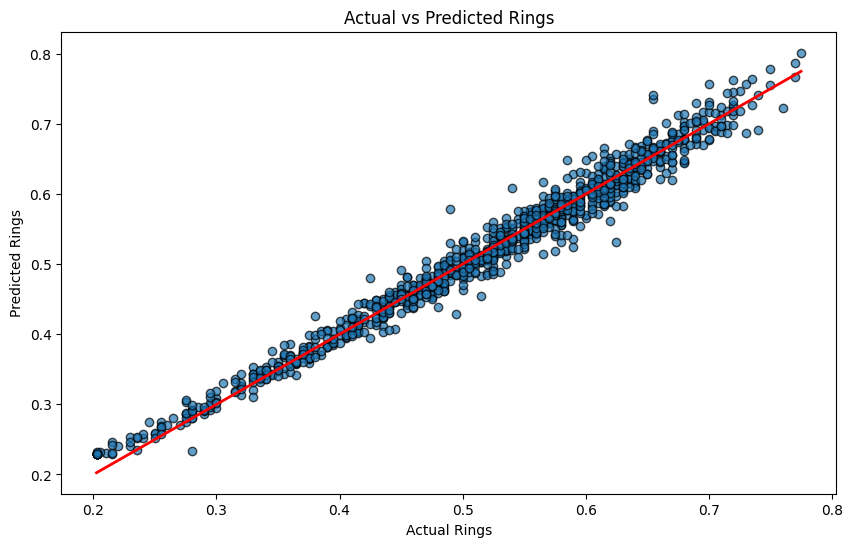

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')
plt.show()

Dalam contoh di atas, kita dapat melihat bahwa titik-titik data tersebar secara merata di sepanjang garis 45 derajat, menunjukkan kesesuaian yang baik antara nilai prediksi dan aktual. Tidak ada pola sistematis yang terlihat dalam perbedaan antara nilai prediksi dan aktual, menunjukkan bahwa model regresi berkinerja baik dalam memprediksi data. Ini adalah indikasi bahwa model tersebut berhasil menangkap pola dalam data dengan baik.

####Visualization: Residuals


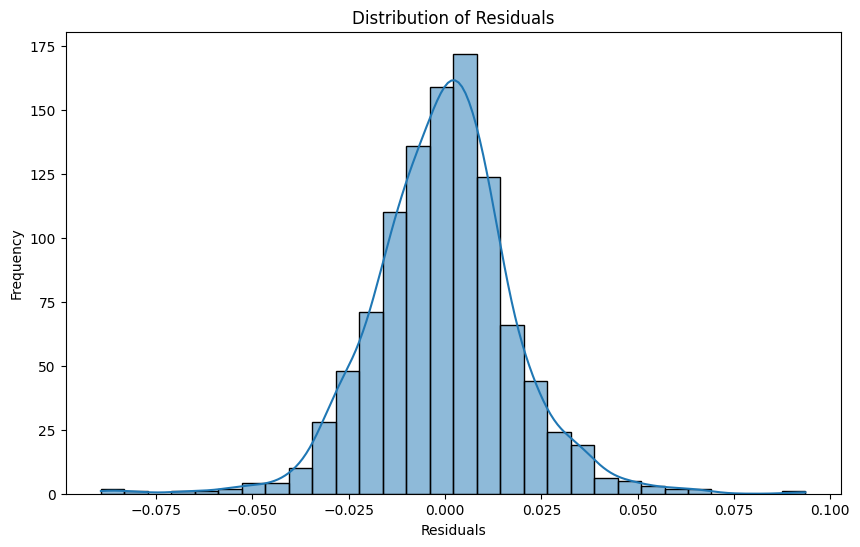

In [61]:
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

Dalam contoh di atas, histogram residuals menunjukkan pola simetris di sekitar nilai nol, yang menunjukkan bahwa distribusi residuals mendekati distribusi normal. Tidak ada outliers yang signifikan yang terlihat, dan varians residuals tetap konstan di sepanjang distribusi. Ini menunjukkan bahwa model regresi berkinerja baik dalam memprediksi data dan bahwa residuals memiliki distribusi yang baik dan dapat diandalkan untuk analisis lebih lanjut.

####Residual plot

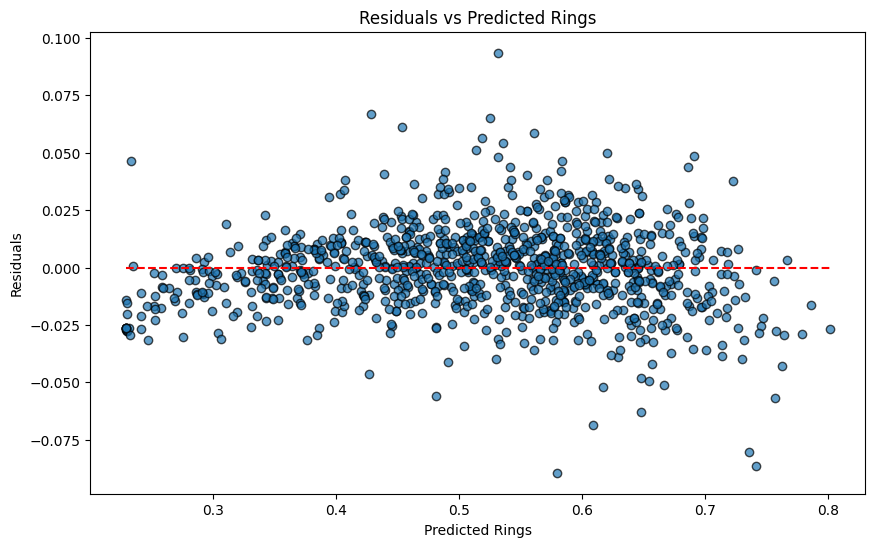

In [64]:

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, edgecolor='k', alpha=0.7)
plt.hlines(0, xmin=min(Y_pred), xmax=max(Y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Rings')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Rings')
plt.show()

Dalam contoh di atas, residuals tersebar secara acak di sepanjang sumbu nol tanpa pola yang jelas. Varians residuals tetap konstan di sepanjang rentang nilai prediksi, dan tidak ada pola sistematis yang terlihat dalam plot. Hal ini menunjukkan bahwa model regresi berkinerja baik dalam memprediksi data, dan tidak ada bias sistematis dalam prediksi.

##F. Kesimpulan
Kesimpulannya, metode machine learning regression dapat memberikan wawasan yang berharga dalam analisis klasifikasi data Abalone, memungkinkan untuk memprediksi umur Abalone berdasarkan fitur-fitur tertentu dan memahami faktor-faktor apa yang mempengaruhi umur mereka. Dengan pemahaman ini, langkah-langkah dapat diambil untuk melindungi dan mengelola populasi Abalone dengan lebih efektif.